https://www.codestudyblog.com/cnb2105a/0516105420.html <br>
https://medium.com/analytics-vidhya/introduction-to-interactive-geoplots-with-plotly-and-mapbox-9249889358eb <br>
https://towardsdatascience.com/interactive-choropleth-maps-with-plotly-46c34fba0e48 <br>
https://towardsdatascience.com/build-an-interactive-choropleth-map-with-plotly-and-dash-1de0de00dce0 <br>
https://towardsdatascience.com/choropleth-maps-in-practice-with-plotly-and-python-672a5eef3a19

In [1]:
import pandas as pd 
import plotly.express as px 
import numpy as np
import plotly

url  = 'https://raw.githubusercontent.com/kefeimo/DataScienceBlog/master/2.geo_plot/df_mapbox_demo.csv'
df_plot_tmp = pd.read_csv(url) 
df_plot_tmp.head()

/opt/anaconda3/envs/dashenv/lib/python3.9/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


device_id gender  age age_cate            timestamp  longitude  \
0  2820430946322886294      M   21     A22-  2016-05-03 12:58:58     108.81   
1  4546116091280128285      M   22     A22-  2016-05-05 18:21:11     110.23   
2  7849111383031438568      M   34   A32-40  2016-05-03 19:51:30     123.49   
3 -1762697191251584400      M   30   A29-31  2016-05-05 14:04:28     114.00   
4  4750870437766392528      M   27   A27-28  2016-05-06 00:44:49     106.52   

   latitude  hour  lon_jitter  lat_jitter  size_for_plot  hour_oct  
0     23.07    12  108.809717   23.071873              1         4  
1     20.04    18  110.235122   20.041807              1         6  
2     41.71    19  123.491060   41.714264              1         6  
3     22.67    14  113.999172   22.670077              1         4  
4     29.51     0  106.520306   29.512754              1         0

In [2]:
plotly.offline.init_notebook_mode(connected=True)

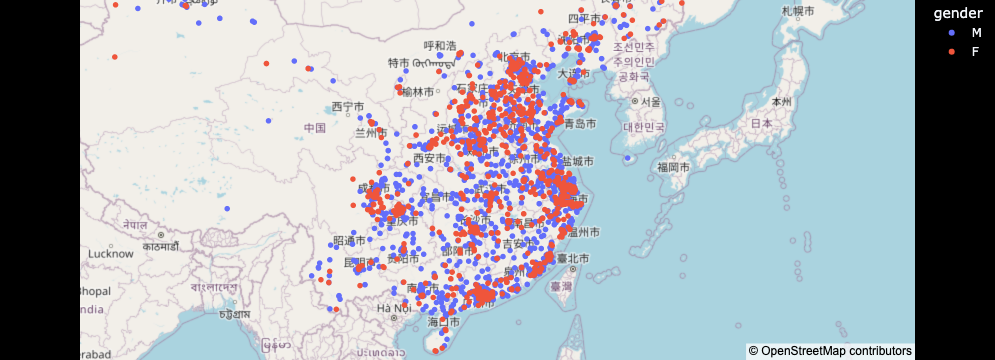

In [3]:
fig = px.scatter_mapbox(df_plot_tmp, lat="latitude", lon="longitude", color="gender", zoom=3, mapbox_style='open-street-map') 
fig.update_layout(template='plotly_dark',
                  paper_bgcolor='#000',
                  plot_bgcolor='#000',
                  margin=dict(t=0, b=0,))
fig.show()

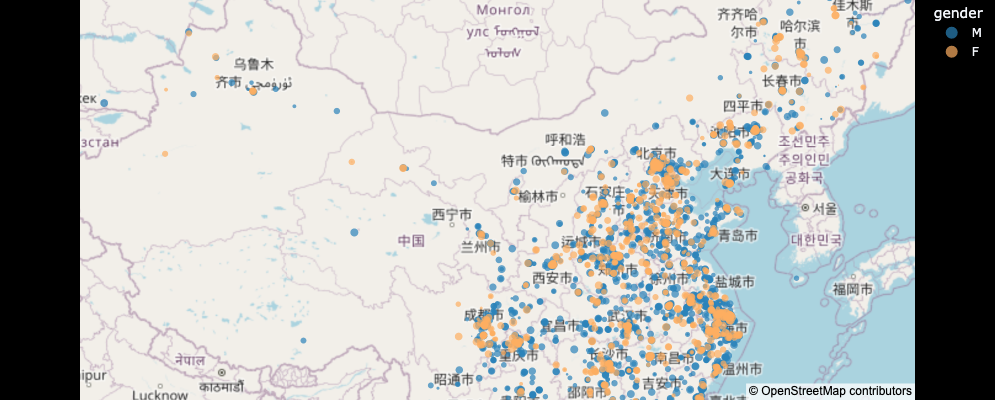

In [4]:
# px.set_mapbox_access_token(mapbox_access_token)
fig = px.scatter_mapbox(df_plot_tmp, lat="latitude", lon="longitude", 
                        color="gender", 
                        mapbox_style='open-street-map',
                        size='hour', size_max=6, 
                        category_orders={'gender':list(df_plot_tmp.gender.unique())},
                        color_discrete_sequence=['#2b83ba', '#fdae61'],
#                         hover_data=1,
#                         hover_name='hour',
#                         text='hour',
                        
                        zoom=3.3,
#                         zoom=2.8,
                        center=dict(lon=105, lat=38),
                       height=400)
fig.update_layout(template='plotly_dark',
                  paper_bgcolor='#000',
                  plot_bgcolor='#000',
                  margin=dict(t=0, b=0,))
fig.show()

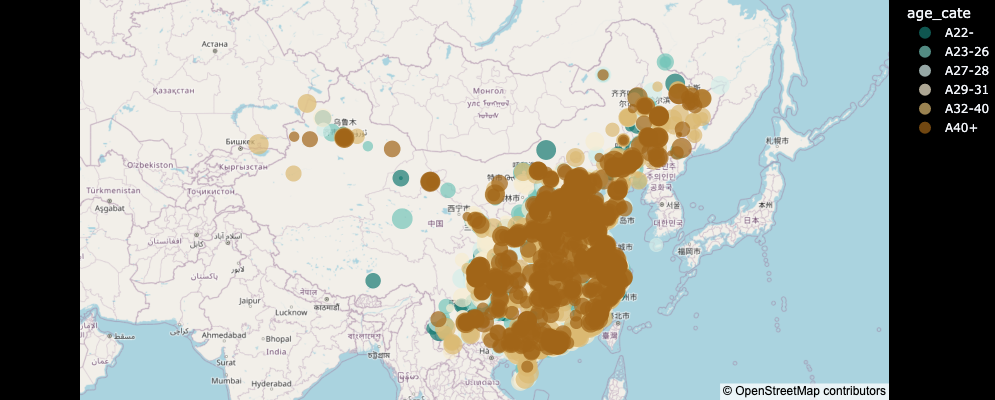

In [5]:
from matplotlib.colors import to_hex
import seaborn as sns
# px.set_mapbox_access_token(mapbox_access_token)
fig = px.scatter_mapbox(df_plot_tmp, lat="latitude", lon="longitude", color="age_cate", mapbox_style='open-street-map',
                         size="hour", size_max=15,
                        category_orders={'age_cate':['A22-', 'A23-26', 'A27-28', 'A29-31', 'A32-40', 'A40+']},
                        color_discrete_sequence=[to_hex(c) for c in sns.color_palette('BrBG_r', 6)],  
                        
                        zoom=2.5,
                        center=dict(lon=105, lat=38, ),
                         height=400,)
fig.update_layout(template='plotly_dark',
                  paper_bgcolor='#000',
                  plot_bgcolor='#000',
                  margin=dict(t=0, b=0,))
fig

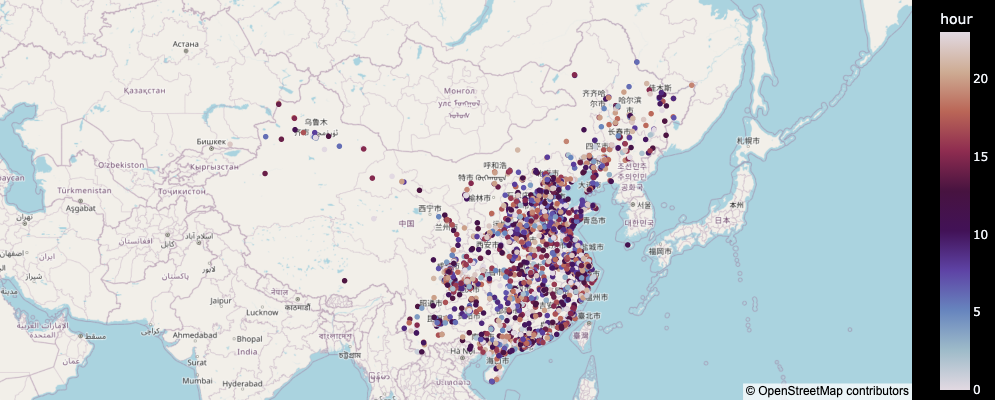

In [6]:
# play with the color: continous/numerical
# px.set_mapbox_access_token(mapbox_access_token)
fig = px.scatter_mapbox(df_plot_tmp, lat="latitude", lon="longitude", color="hour", 
                         #size="hour",
                        color_continuous_scale=px.colors.cyclical.Twilight, 
                        mapbox_style='open-street-map',
                        zoom=2.5,
                        center=dict(lon=105, lat=38, ),
                        height=400,)

fig.update_layout(template='plotly_dark',
                  paper_bgcolor='#000',
                  plot_bgcolor='#000',
                  margin=dict(t=0, b=0, r=0, l=0))
fig.show()

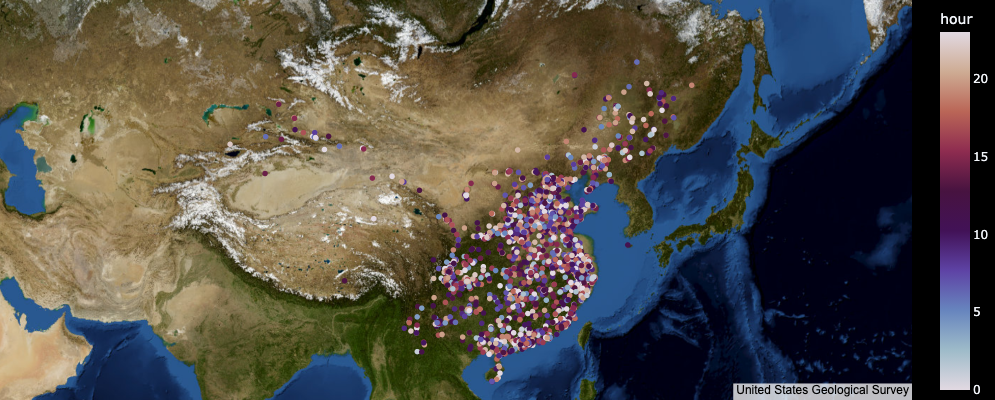

In [7]:
# play with the color: continous/numerical
# px.set_mapbox_access_token(mapbox_access_token)
fig = px.scatter_mapbox(df_plot_tmp, lat="latitude", lon="longitude", color="hour", 
                         #size="hour",
                        color_continuous_scale=px.colors.cyclical.Twilight, 
                        mapbox_style='open-street-map',
                        zoom=2.5,
                        center=dict(lon=105, lat=38, ),
                        height=400,)

fig.update_layout(template='plotly_dark',
                  paper_bgcolor='#000',
                  plot_bgcolor='#000',
                  margin=dict(t=0, b=0, r=0, l=0),
                  mapbox_style="white-bg",
    mapbox_layers=[
        {
            "below": 'traces',
            "sourcetype": "raster",
            "sourceattribution": "United States Geological Survey",
            "source": [
                "https://basemap.nationalmap.gov/arcgis/rest/services/USGSImageryOnly/MapServer/tile/{z}/{y}/{x}"
            ]
        }
      ])
fig.show()

### methode

In [8]:
import numpy as np                   # for multi-dimensional containers 
import pandas as pd                  # for DataFrames
import plotly.graph_objects as go    # for data visualisation
import plotly.io as pio              # to set shahin plot layout
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
from IPython.display import display, clear_output

In [9]:
pio.templates['shahin'] = pio.to_templated(
    go.Figure().update_layout(
        legend=dict(orientation="h",y=1.1, x=.5, xanchor='center'),
        margin=dict(t=0,r=0,b=0,l=0)
    )
).layout.template
pio.templates.default = 'shahin'

In [10]:
data = pd.read_csv('https://shahinrostami.com/datasets/phe_covid_uk_11032020.csv')
data.head()

HTTPError: HTTP Error 404: Not Found

In [11]:
# exemple
geolocator = Nominatim(user_agent="covid_shahinrostami.com")
data.local_authority[10]
location = geolocator.geocode(f"{data.local_authority[10]}, UK")
print(location.latitude, location.longitude)


NameError: name 'data' is not defined

In [12]:
for index, row in data.iterrows():
    location = geolocator.geocode(f"{row.local_authority}, UK",timeout=100)

    data.loc[index,'lat'] = location.latitude 
    data.loc[index,'lon'] = location.longitude

    # None of the following code is required
    # I just wanted a progress bar!
    clear_output(wait = True)
    amount_unloaded = np.floor(((data.shape[0]-index)/data.shape[0])*25).astype(int)
    amount_loaded = np.ceil((index/data.shape[0])*25).astype(int)
    loading = f"Retrieving locations >{'|'*amount_loaded}{'.'*amount_unloaded}<"
    display(loading)

print("Done!")

NameError: name 'data' is not defined

In [13]:
data['text'] = data['local_authority'] + '<br>Confirmed Cases ' + (data['confirmed_cases']).astype(str)

import plotly.graph_objects as go

mapbox_access_token = 'pk.eyJ1IjoicXM2MjcyNTI3IiwiYSI6ImNraGRuYTF1azAxZmIycWs0cDB1NmY1ZjYifQ.I1VJ3KjeM-S613FLv3mtkw'

fig = go.Figure(go.Scattermapbox(
    lon = data['lon'],
    lat = data['lat'],
        mode = 'markers',
        marker = go.scattermapbox.Marker(
            size = data['confirmed_cases']/.5,
            color = 'rgb(180,0,0)',
        ),
        text = data['text'],
    ))

fig.update_layout(
    autosize = True,
    hovermode = 'closest',
    mapbox = dict(
        accesstoken = mapbox_access_token,
        center = {'lat': (data.lat.min() + data.lat.max())/2,
                'lon': (data.lon.min() + data.lon.max())/2},
        bearing = 0,
        pitch = 0,
        zoom = 5,
        style = "basic", # try basic, dark, light, outdoors, or satellite.
    ),
)

fig.show()

NameError: name 'data' is not defined

# method

In [14]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import dash_bootstrap_components as dbc
import pandas as pd
import numpy as np
import dash_table

<ipython-input-14-11f110d47f38>:2: UserWarning:


The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`

<ipython-input-14-11f110d47f38>:3: UserWarning:


The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`

<ipython-input-14-11f110d47f38>:7: UserWarning:


The dash_table package is deprecated. Please replace
`import dash_table` with `from dash import dash_table`

Also, if you're using any of the table format helpers (e.g. Group), replace 
`from dash_table.Format import Group` with 
`from dash.dash_table.Format import Group`



In [15]:
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_february_us_airport_traffic.csv')
df.head()

iata                            airport               city state country  \
0  ORD       Chicago O'Hare International            Chicago    IL     USA   
1  ATL  William B Hartsfield-Atlanta Intl            Atlanta    GA     USA   
2  DFW    Dallas-Fort Worth International  Dallas-Fort Worth    TX     USA   
3  PHX   Phoenix Sky Harbor International            Phoenix    AZ     USA   
4  DEN                        Denver Intl             Denver    CO     USA   

         lat        long    cnt  
0  41.979595  -87.904464  25129  
1  33.640444  -84.426944  21925  
2  32.895951  -97.037200  20662  
3  33.434167 -112.008056  17290  
4  39.858408 -104.667002  13781

In [16]:
# Subset dataframe to show some specific columns in dash web app
df1 = df[['city','state','country','lat','long','cnt']]

# Find Lat Long center
lat_center = sum(df['lat'])/len(df['lat'])
long_center = sum(df['long'])/len(df['long'])

# Find Lat Long center
lat_center = sum(df['lat'])/len(df['lat'])
long_center = sum(df['long'])/len(df['long'])

In [17]:
app = dash.Dash(external_stylesheets=[dbc.themes.BOOTSTRAP])
app.title = 'Open Street Map'

In [18]:
layout_map = dict(
    autosize=True,
    height=500,
    weidth=100,
    font=dict(color="#191A1A"),
    titlefont=dict(color="#191A1A", size='14'),
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    ),
    hovermode="closest",
    plot_bgcolor='#fffcfc',
    paper_bgcolor='#fffcfc',
    legend=dict(font=dict(size=10), orientation='h'),
    mapbox=dict(
        style="open-street-map",
        center=dict(
            lon = long_center,
            lat = lat_center
        ),
        zoom=2,
    )
)

In [19]:
app.layout = html.Div([
    
    html.Div(className='row', children=[
        dbc.Col(html.H1(children='Plot Lat Long using Open Street Map in Dash'), md=12),
        dbc.Col(html.H6(children='''Plotting all airports in map using respective lat long value'''), md=12)
    ]),

    html.Br(),
    
    html.Div(className='row', children=[
        html.Div(className='col-lg-6', children=[
            dash_table.DataTable(
                id='table',
                columns=[{"name": i, "id": i} for i in df1.columns],
                data=df1.loc[:14,].to_dict('records'),
            ),
        ]),
        
        html.Div(className='col-lg-6', children=[
            dcc.Graph(
                id='MapPlot',
                figure={
                    "data": [{
                        "type": "scattermapbox",
                        "lat": list(df.lat),
                        "lon": list(df.long),
                        "hoverinfo": "text",
                        "hovertext": [[
                            "Lat: {} Long: {} Count: {}".format(i,j,k)]
                            for i,j,k in zip(df['lat'], df['long'],df['cnt'])],
                        "mode": "markers",
                        "name": list(df['state']),
                        "marker": {
                        "size": 15,
                        "opacity": 0.7,
                        "color": '#F70F0F'
                        }
                     }],
                    "layout": layout_map
                }
            ),
        ])
    ])
])

In [20]:
if __name__ == '__main__':
    app.run_server(port=1209)

# Method

In [21]:
import plotly
import numpy as np
import json
import urllib.request
import plotly.graph_objs as go
plotly.__version__

'5.9.0'

In [22]:
fr_url = 'https://raw.githubusercontent.com/gregoiredavid/france-geojson/master/regions.geojson'

In [ ]:
with urllib.request.urlopen(fr_url) as url:
    jdata = json.loads(url.read().decode())
    print(jdata.keys())
jdata

In [ ]:
L = len(jdata['features'])
jdata['features'][0].keys()


In [24]:
for k in range(L):
    jdata['features'][k]['id'] = f'{k}'
    
regions = []
for feat   in jdata['features']:
    regions.append(feat['properties']['nom'])
regions

NameError: name 'L' is not defined

In [25]:
k=5
jdata['features'][k]['id']

KeyError: 'id'

In [26]:
mapbox_accesstoken = 'pk.eyJ1IjoicXM2MjcyNTI3IiwiYSI6ImNraGRuYTF1azAxZmIycWs0cDB1NmY1ZjYifQ.I1VJ3KjeM-S613FLv3mtkw'

In [27]:
pl_deep=[[0.0, 'rgb(253, 253, 204)'],
         [0.1, 'rgb(201, 235, 177)'],
         [0.2, 'rgb(145, 216, 163)'],
         [0.3, 'rgb(102, 194, 163)'],
         [0.4, 'rgb(81, 168, 162)'],
         [0.5, 'rgb(72, 141, 157)'],
         [0.6, 'rgb(64, 117, 152)'],
         [0.7, 'rgb(61, 90, 146)'],
         [0.8, 'rgb(65, 64, 123)'],
         [0.9, 'rgb(55, 44, 80)'],
         [1.0, 'rgb(39, 26, 44)']]

In [28]:
years = ['2004','2008','2012','2016']    
data = []   

In [29]:
L

NameError: name 'L' is not defined

In [30]:
jdata['features'][3]['id']

KeyError: 'id'

In [31]:
years = ['2004','2008','2012','2016']    
data = []    
    

for q in years:
    data.append( go.Choroplethmapbox(locations = [jdata['features'][k]['id'] for k in range(L)],
                                     z = np.random.randint(13, 75,  size=L), #synthetic data
                                     colorscale = pl_deep,
                                     text =regions, 
                                     colorbar = dict(thickness=20, ticklen=3),
                                     geojson = jdata,
                                     marker_line_width=0, marker_opacity=0.7,
                                     visible=False))
data[0]['visible'] = True

NameError: name 'L' is not defined

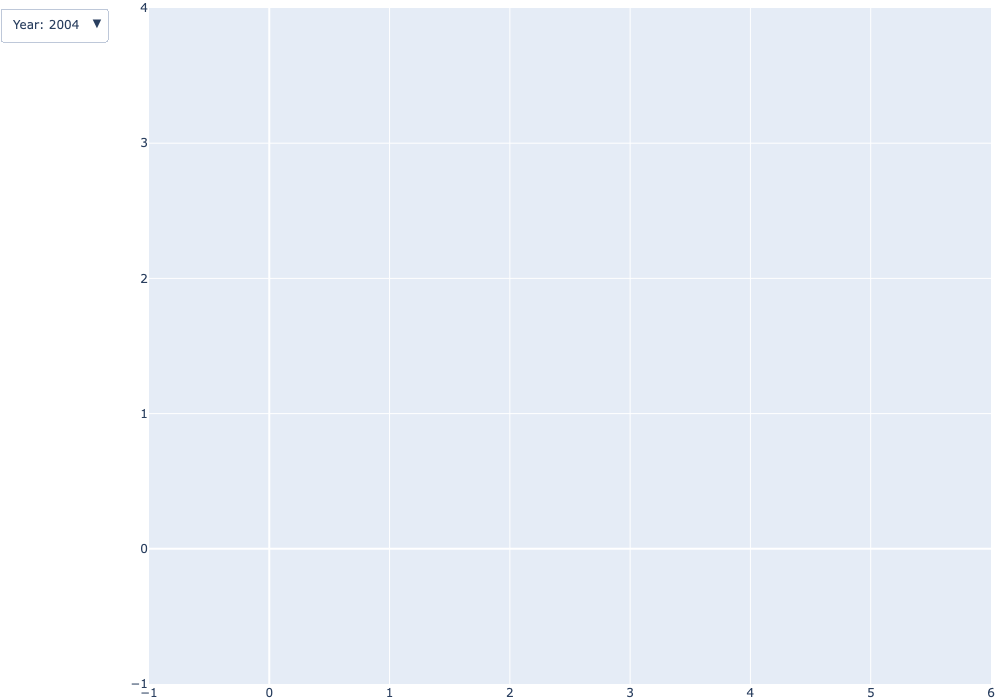

In [32]:
layout = go.Layout(width = 700, height=700,
                  mapbox = dict(center= dict(lat=46.22, lon= 2.213),
                                accesstoken=mapbox_accesstoken,
                                zoom=4.50))
layout.update(updatemenus=list([
        dict(
            x=-0.05,
            y=1,
            yanchor='top',
            buttons=list([
                dict(
                    args=['visible', [True, False, False, False]],
                    label='Year: 2004',
                    method='restyle'
                ),
                dict(
                    args=['visible', [False, True, False, False]],
                    label='Year: 2008',
                    method='restyle'
                ),
                dict(
                    args=['visible', [False, False, True, False]],
                    label='Year: 2012',
                    method='restyle'
                ),
                dict(
                    args=['visible', [False, False, False, True]],
                    label='Year: 2016',
                    method='restyle'
                )
            ]),
        )]))
fig=go.Figure(data=data, layout =layout)
fig.show()

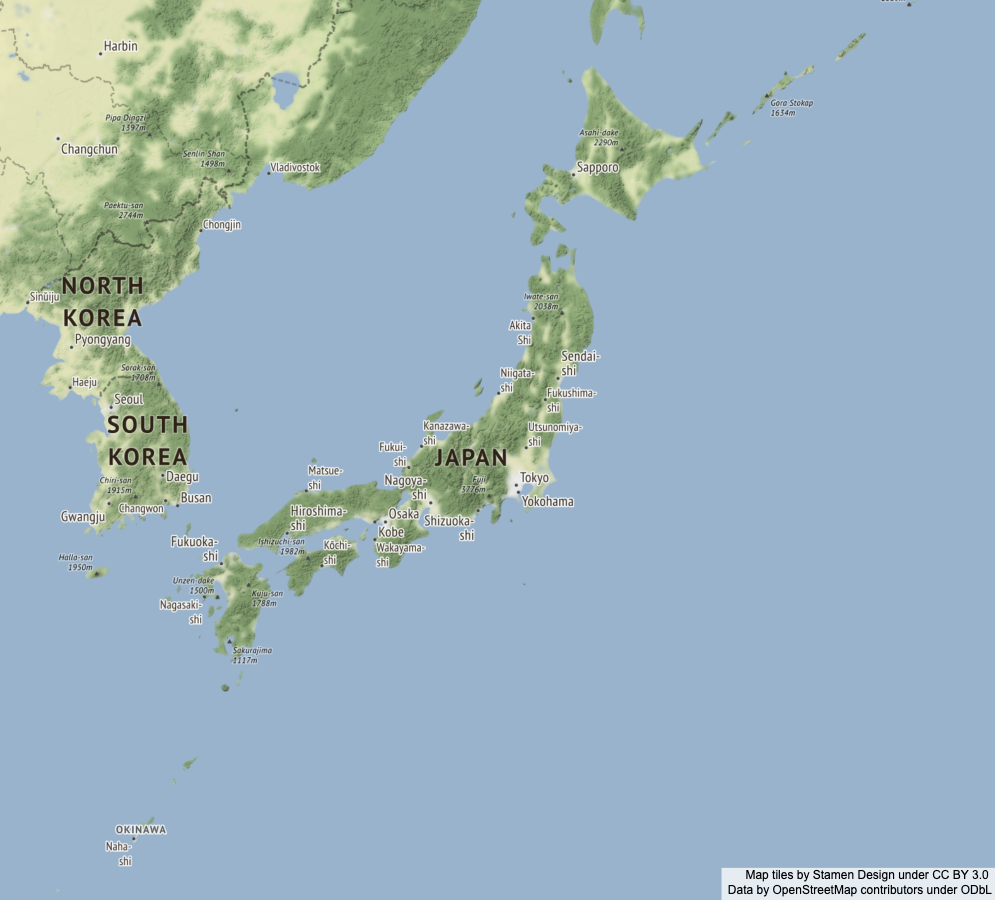

'https://medium.com/@evryinhkyprkbsk/visualization-of-map-information-with-plotly-mapbox-ea56f3d935a7'

In [33]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scattermapbox())

fig.update_layout(margin ={'l':0,'t':0,'b':0,'r':0},
                  mapbox = {
                      'center': {'lon': 139, 'lat': 36.5},
                      'style': "stamen-terrain",
                      'zoom': 4.5},
                  width=1600,
                  height=900,)
fig.show()

'https://medium.com/@evryinhkyprkbsk/visualization-of-map-information-with-plotly-mapbox-ea56f3d935a7'

In [ ]:
!jt -r

In [ ]:
!jupyter nbconvert scatter_mapbox.ipynb --to html  --post serve